## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [46]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [47]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a557650>,
 'caps': [<matplotlib.lines.Line2D at 0x11a240450>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a517550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a5174d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a557d90>,
  <matplotlib.lines.Line2D at 0x11cffe110>]}

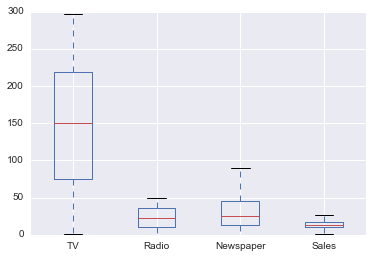

In [48]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

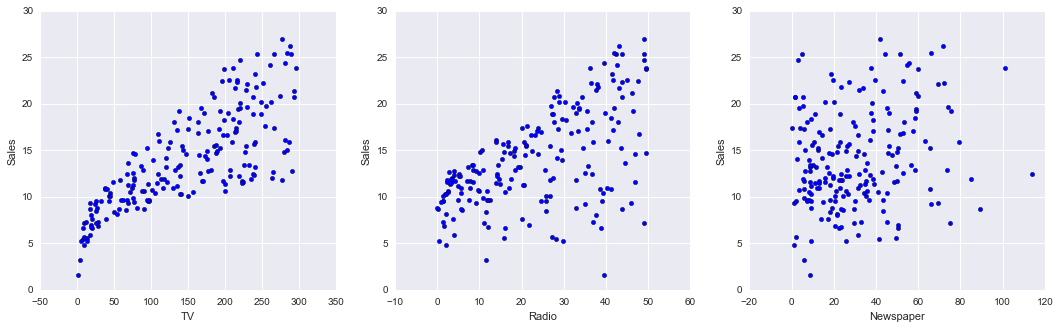

In [49]:
fig = plt.figure()
fig.set_size_inches(18,5)
axes = fig.add_subplot(1,3,1)
plt.scatter(df.TV,df.Sales)
axes = plt.xlabel('TV')
axes = plt.ylabel('Sales')

axes = fig.add_subplot(1,3,2)
plt.scatter(df.Radio,df.Sales)
axes = plt.xlabel('Radio')
axes = plt.ylabel('Sales')

axes = fig.add_subplot(1,3,3)
plt.scatter(df.Newspaper,df.Sales)
axes = plt.xlabel('Newspaper')
axes = plt.ylabel('Sales')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125779810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dc7cad0>]], dtype=object)

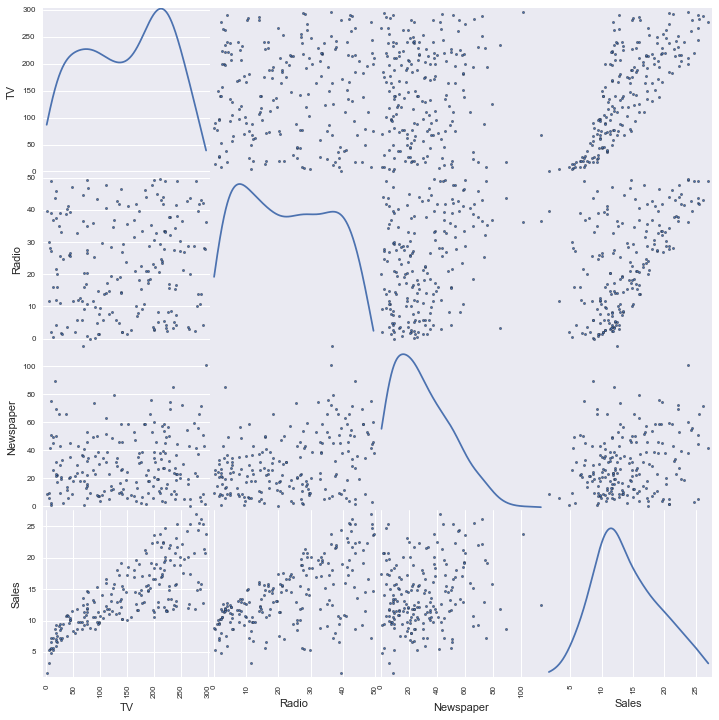

In [50]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=1.0, figsize=(12, 12), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

From the figure, we can find that TV and Sales seem to have strong correlation, while Radio, Newspaper and Sales seem to be lower. Cause TV and sales are approximately to have linear relation. TV and Radio seem to have no correlation the figure are totally scatter dots.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [51]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [52]:
y = df['Sales']

b) Set X to be just the features described above in df

In [53]:
X = df[['TV','Radio','Newspaper']]


c) Randomly split data into training and testing - 80% training, 20% testing.

In [54]:
msk = range(len(X)+1)
msk = msk[1:]
random.shuffle(msk)


train_index = msk[0:int(len(X)*0.8)]
test_index = msk[int(len(X)*0.8):len(X)]

X_train = X.ix[train_index]
y_train = y.ix[train_index]

X_test = X.ix[test_index]
y_test = y.ix[test_index]

print len(y_test)
print len(y_train)
print len(X)

40
160
200


d) Train model on training data, and make predictions on testing data

In [55]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

('Coefficients: \n', array([ 0.04505423,  0.19300016, -0.00278145]))
Residual sum of squares: 4.64


e) Evalute the R^2 on training data. Is this good? Bad? Why?

Variance score: 0.81


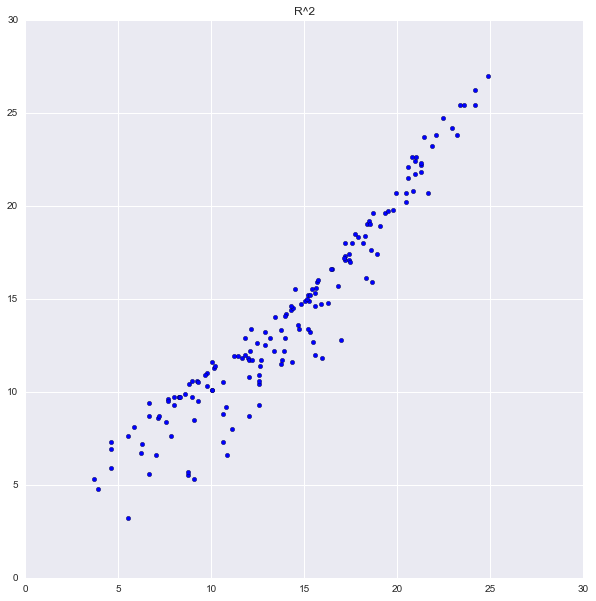

In [56]:
plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(X_train),y_train)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))



The result is good. We got the $R^2$ is 0.94. That is to say, 94 percent of the variance in the y can be explained by the X, which means we have 94 percent confidence to our model. The remaining 6 percent can be attributed to unknown, lurking variables or inherent variability.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

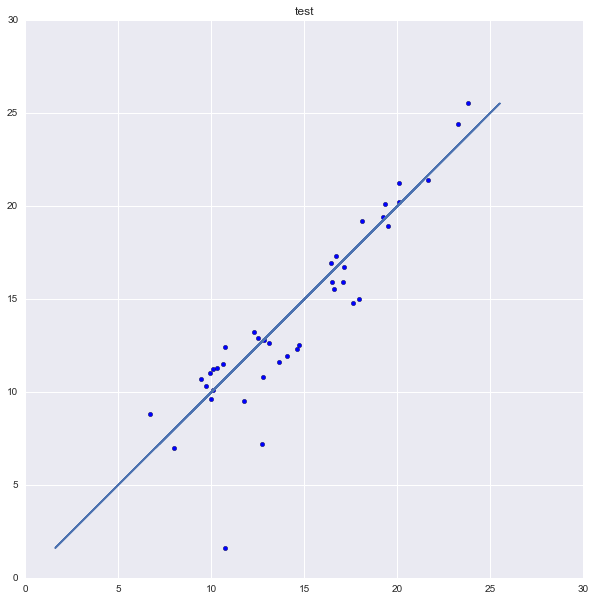

In [57]:
plt.figure(figsize=(10,10))
plt.title('test')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

It's a good model. We scatter plot the prediction value vs true value and then we plot the true solution as a traight line. From the figure, we can find that most of test data fit the line well which means we get small error in this model.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [58]:
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([ 0.04505423,  0.19300016, -0.00278145]))


From the regression coefficient, we can find that Radio has the biggest coefficient, and then is TV and newspaper. But we still have to take in account the variance of each coefficient.Cause the feature with high variance may have little contribution to the model.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Normlize the coefficient is criticle to our feature selection. We should always take the variance into account. One way to measure the importance of the feature is by measure the ratio between coefficient and standard of error of the feature which can eliminating the variance of the feature.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

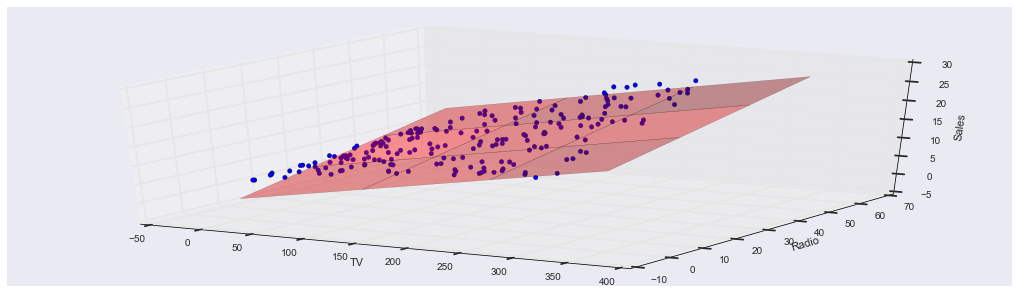

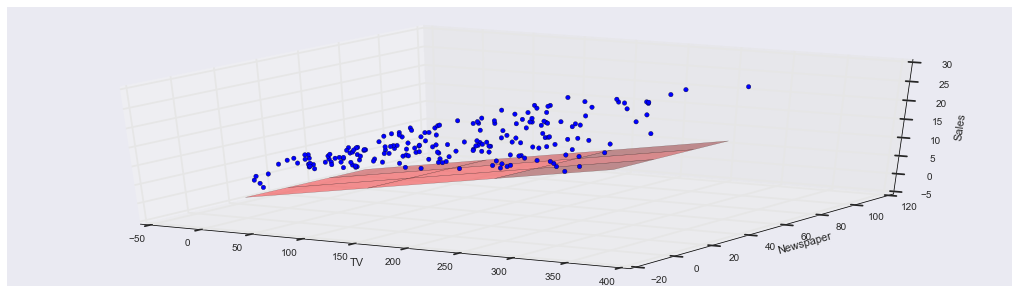

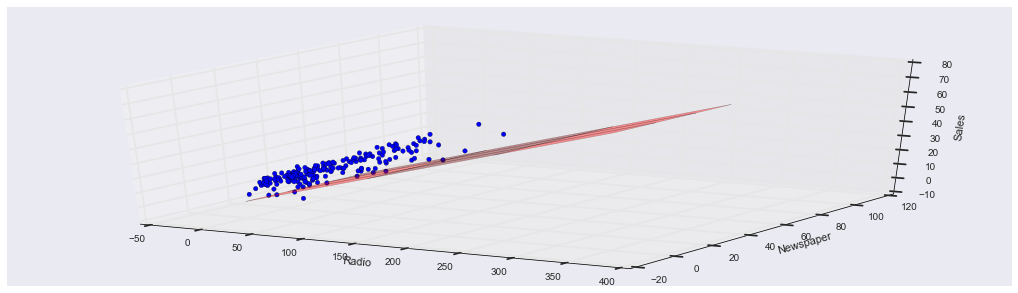

In [59]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy


fig = plt.figure(1)
fig.set_size_inches(18,5)
axes = fig.add_subplot(1,1,1,projection='3d')
axes.scatter(df.TV,df.Radio,df.Sales,alpha=1)
axes.set_xlabel('TV')
axes.set_ylabel('Radio')
axes.set_zlabel('Sales')

x = numpy.linspace(0, 350, 30)
y = numpy.linspace(0, 60,30)
X, Y = numpy.meshgrid(x,y)
plane = numpy.array([regr.coef_[0] * x + regr.coef_[1] * y for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = plane.reshape(X.shape)

axes.plot_surface(X,Y,Z, color='red', alpha=0.4)

fig = plt.figure(2)
fig.set_size_inches(18,5)
axes = fig.add_subplot(1,1,1,projection='3d')
axes.scatter(df.TV,df.Newspaper,df.Sales,alpha=1)
axes.set_xlabel('TV')
axes.set_ylabel('Newspaper')
axes.set_zlabel('Sales')

x = numpy.linspace(0, 350, 30)
y = numpy.linspace(0, 60,30)
X, Y = numpy.meshgrid(x,y)
plane = numpy.array([regr.coef_[0] * x + regr.coef_[2] * y for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = plane.reshape(X.shape)

axes.plot_surface(X,Y,Z, color='red', alpha=0.4)

fig = plt.figure(3)
fig.set_size_inches(18,5)
axes = fig.add_subplot(1,1,1,projection='3d')
axes.scatter(df.Radio,df.Newspaper,df.Sales,alpha=1)
axes.set_xlabel('Radio')
axes.set_ylabel('Newspaper')
axes.set_zlabel('Sales')

x = numpy.linspace(0, 350, 30)
y = numpy.linspace(0, 60,30)
X, Y = numpy.meshgrid(x,y)
plane = numpy.array([regr.coef_[1] * x + regr.coef_[2] * y for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = plane.reshape(X.shape)

axes.plot_surface(X,Y,Z, color='red', alpha=0.4)

plt.show()


From the first subplot, we can find out that without the newspaper, we use TV and Radio to predict, the model fits well. And also in the third subplot, without TV data fit well but it only take part in small area of the plane. The reason for that is TV and Newspaper tend to have higher variance which the weight for that dimension will be sensitive to the data and generate large variance. So we need to pick out the dimension with large variance control them to make our data more predictable. 

Obviously from the matrix scatter plot in problem 1, we find out that the distribution of TV, Radio and Newspaper is not normal. So use the non-parametric method will better fit the data

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


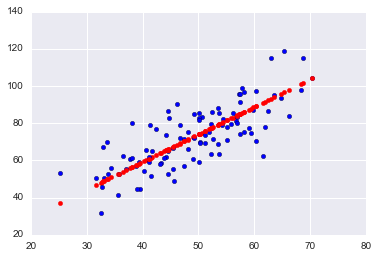

In [60]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("/Users/apple/Documents/university/data science industry/test/adult/APMAE4990-/data/data.csv", delimiter=",")

    learning_rate = 0.0001
    initial_b = 0.0 # initial y-intercept guess
    initial_m = 0.0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

By changing the learning rate, we can find that, when learning rate is small such as 0.00001,0.0001 the error is gradually getting smaller and then converge to the what we want, and with learning rate getting smaller, the convergence speed will slow down which take more steps. However, if learning rate is big such as 0.1. The error is getting bigger and oscillated. 

To explain this, the learning rate is actually the step size we try to move to the minimum or maximum. If step size is small, it will take longer time but will finally reach the target. But if the step size is big, it will go across the other side of the curve and then oscillate around the target point which don't converge anymore.

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 0 iterations b = 0.0, m = 0.0, error = 5565.10783448


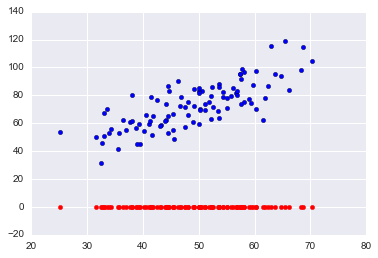

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


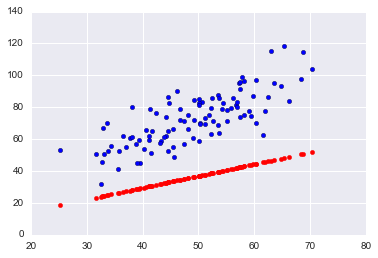

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


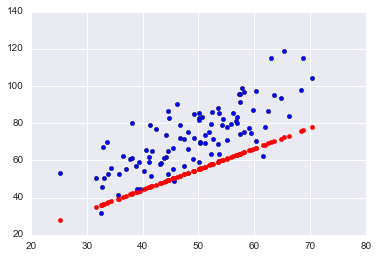

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


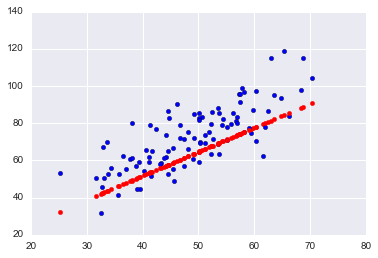

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


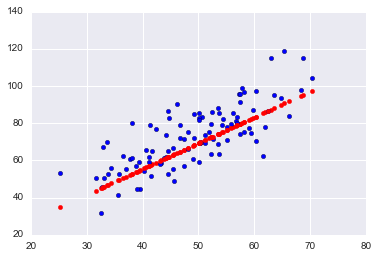

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


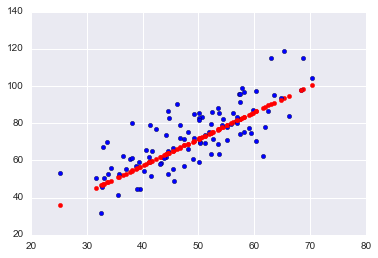

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


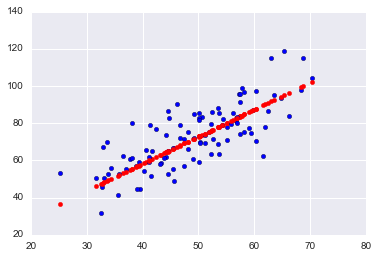

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


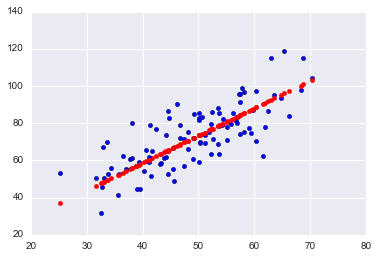

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


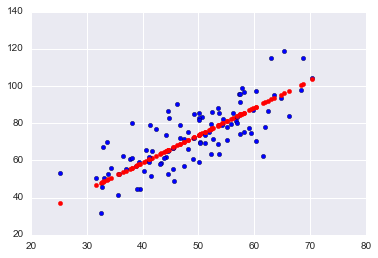

Starting gradient descent at b = 0.0, m = 0.0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


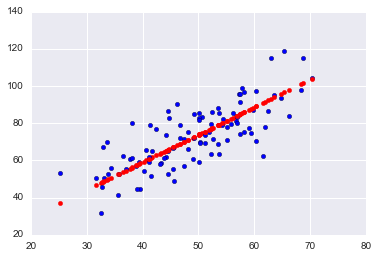

In [61]:


for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

learning rate is  0.001


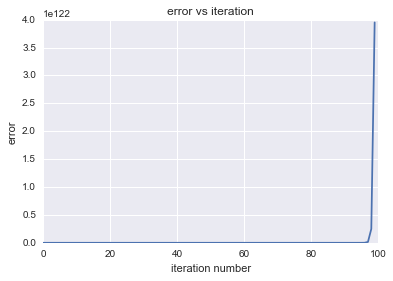

learning rate is  0.0001


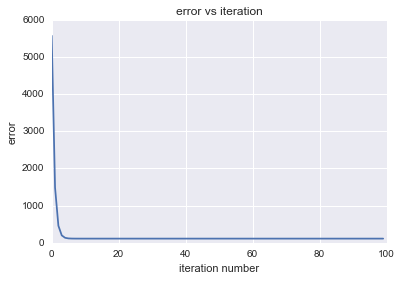

learning rate is  1e-05


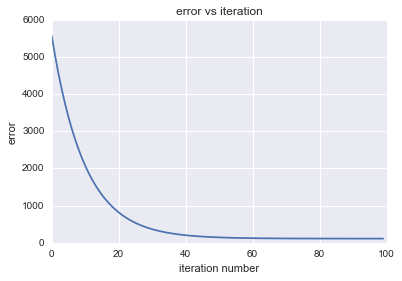

learning rate is  1e-06


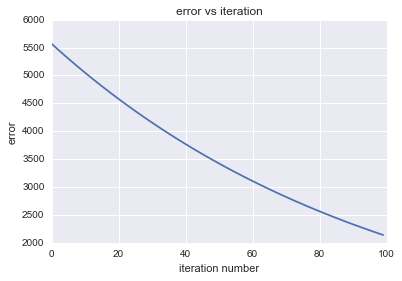

In [62]:
import numpy
def errcal(num_iterations,learning_rate):
    points = genfromtxt("/Users/apple/Documents/university/data science industry/test/adult/APMAE4990-/data/data.csv", delimiter=",")
    initial_b = 0.0 # initial y-intercept guess
    initial_m = 0.0 # initial slope guess
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    return error

for n in range(3,7):
    lr = 10 ** (-n)
    print "learning rate is ", lr
    fig = plt.figure(1)
    error = numpy.ones(100)
    num = numpy.ones(100)
    for n in range(100):
        num[n] = n
        error[n] = errcal(n,lr)
    
    
    
    plt.plot(num,error)
    plt.title("error vs iteration")
    plt.xlabel("iteration number")
    plt.ylabel("error")

    plt.show()

As we can see from the figure, when learning rate is 0.001. The error is getting bigger and not converge anymore. When learning rate is small, it begins to converge and with learning rate getting smaller, converge speed slow down.